<a href="https://colab.research.google.com/github/SankethHanasi/6thSem-ML-Lab/blob/main/1BM22CS242_Lab_4_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

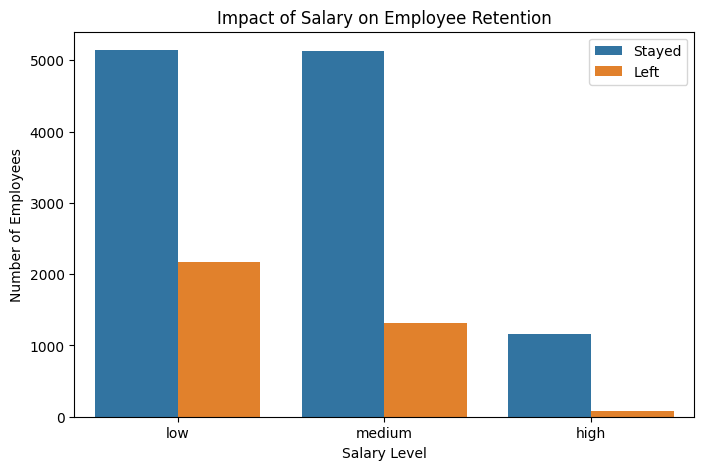

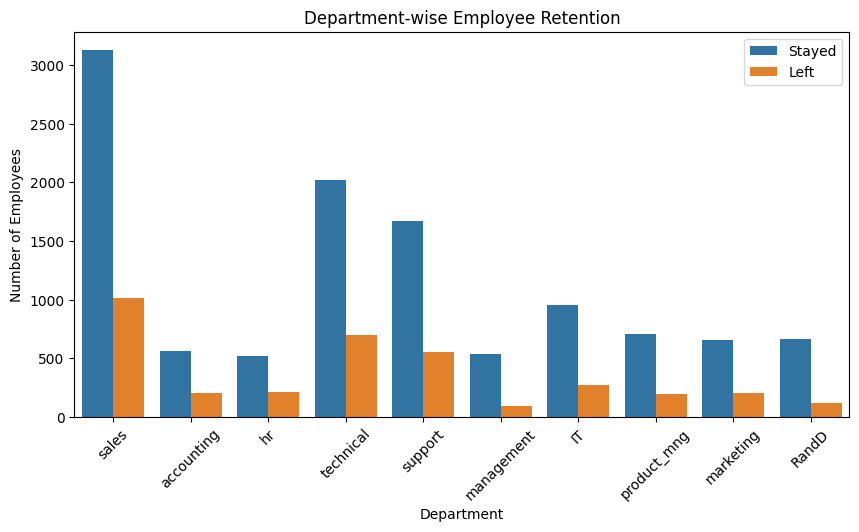

Model Accuracy: 0.7693


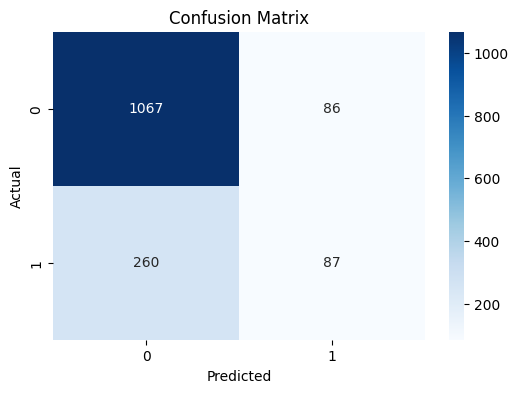

Probability of leaving: 0.3550


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "/content/HR_comma_sep.csv"
df = pd.read_csv(file_path)

# Exploratory Data Analysis
# Plot bar chart showing impact of salaries on retention
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='salary', hue='left')
plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.legend(["Stayed", "Left"])
plt.show()

# Plot bar chart showing correlation between department and employee retention
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Department', hue='left')
plt.title("Department-wise Employee Retention")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.legend(["Stayed", "Left"])
plt.show()

# Selecting key features based on analysis
X = df[['satisfaction_level', 'time_spend_company', 'Work_accident', 'salary']]
X = pd.get_dummies(X, columns=['salary'], drop_first=True)  # Convert categorical 'salary' to numerical
y = df['left']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=10)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_predicted = model.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_predicted)
print(f"Model Accuracy: {accuracy:.4f}")

# Plotting actual vs predicted values
plt.figure(figsize=(6, 4))
sns.heatmap(pd.crosstab(y_test, y_predicted), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Predict probability of an employee leaving
def predict_leave_probability(features):
    return model.predict_proba([features])[0][1]  # Probability of leaving

# Example prediction
example_employee = [[0.5, 3, 0, 1, 0]]  # Sample feature values with one-hot encoded salary
probability = predict_leave_probability(example_employee[0])
print(f"Probability of leaving: {probability:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 0.9524


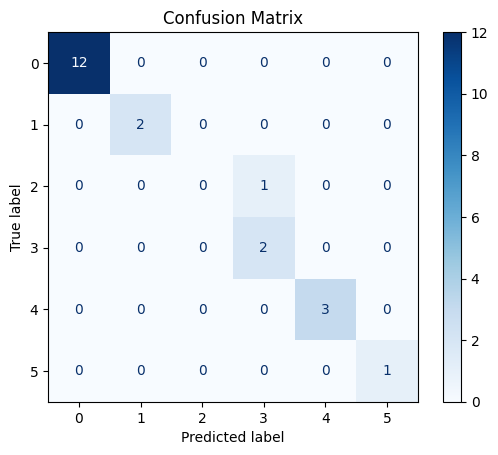

Predicted Class Probabilities: [[9.64364496e-01 2.89245121e-03 8.35528240e-03 3.80911420e-04
  1.02874707e-02 4.80552379e-03 8.91386439e-03]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
file_path = "/content/zoo-data.csv"
df = pd.read_csv(file_path)

# Selecting features and target variable
X = df.drop(columns=['animal_name', 'class_type'])  # Drop non-numeric column and target
y = df['class_type']  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model for multiclass classification
model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_predicted = model.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_predicted)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_predicted)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Predict probability of class type for a sample animal
def predict_class_probability(features):
    return model.predict_proba([features])

# Example prediction
example_animal = X.iloc[0].values  # Taking the first animal's feature set as an example
probability = predict_class_probability(example_animal)
print(f"Predicted Class Probabilities: {probability}")